In [1]:
import os
import pandas as pd
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from datetime import datetime

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marcl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=news_api_key)

In [5]:
# Creating a function to collect news articles, create sentiment analysis and dataframe with everything in it

def news_dataframe(topic):
    news = newsapi.get_everything(q='{topic}',
                #sources='bbc-news,the-verge',
                domains='bbc.co.uk,techcrunch.com',
                from_param='2019-09-23',
                to='2019-10-21',
                language='en',
                sort_by='relevancy',
                page=2)

    
    articles = []
    for article in news['articles']:
        try:
            sentiment = sid.polarity_scores(article["description"])
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"],
            })
        except AttributeError:
            pass
    
    return pd.DataFrame(articles)



In [6]:
# Run function for ethereum and bitcoin
ethereum_articles = news_dataframe('ethereum')
bitcoin_articles = news_dataframe('bitcoin')

In [7]:
bitcoin_articles.head()

,compound,date,description,negative,neutral,positive,text,title
0,0.7269,2019-10-14,The 1998 Good Friday Agreement allows people t...,0.000,0.663,0.337,Media caption'This decision goes against Good ...,Emma De Souza: Home Office appeal of case is u...
1,0.5267,2019-10-20,"A future free of the three diseases is ""within...",0.000,0.747,0.253,Image copyrightGetty ImagesImage caption\r\n U...,"Measles, mumps and rubella: How do we eliminat..."
2,-0.5574,2019-10-16,A head teacher says the outright ban detracted...,0.286,0.714,0.000,Image copyrightGetty ImagesImage caption\r\n P...,School's mobile phone ban relaxed to 'ease fri...
3,0.0000,2019-09-25,Boris Johnson returns from New York early as P...,0.000,1.000,0.000,Media playback is unsupported on your device\r...,Parliament: MPs and peers return after court r...
4,0.7506,2019-10-02,Rose Glass is honoured for debut feature Saint...,0.000,0.714,0.286,Image copyrightGetty ImagesImage caption\r\n D...,Horror film wins first-time director Rose Glas...


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_articles.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.207190,0.050500,0.832100,0.117400
std,0.465765,0.098103,0.106542,0.104944
min,-0.750600,0.000000,0.663000,0.000000
25%,0.000000,0.000000,0.749250,0.038250
50%,0.315900,0.000000,0.837000,0.099000
75%,0.534375,0.044750,0.907000,0.166000
max,0.765000,0.286000,1.000000,0.337000


In [9]:
# Describe the Ethereum Sentiment
ethereum_articles.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.207190,0.050500,0.832100,0.117400
std,0.465765,0.098103,0.106542,0.104944
min,-0.750600,0.000000,0.663000,0.000000
25%,0.000000,0.000000,0.749250,0.038250
50%,0.315900,0.000000,0.837000,0.099000
75%,0.534375,0.044750,0.907000,0.166000
max,0.765000,0.286000,1.000000,0.337000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A:

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stop words list if necessary

In [12]:
# Complete the tokenizer function
def tokenizer(article):
   """Tokenizes text."""
   sw = set(stopwords.words('english'))
   regex = re.compile("[^a-zA-Z ]")
   re_clean = regex.sub('', article)
   words = word_tokenize(re_clean)
   lem = [lemmatizer.lemmatize(word) for word in words]
   output = [word.lower() for word in lem if word.lower() not in sw]
   return tokens


In [13]:
# Create a new tokens column for bitcoin
article = bitcoin_articles["description"]
tokenizer(article)

TypeError: expected string or bytes-like object

In [0]:
# Create a new tokens column for ethereum
article = ethereum_articles["description"]
tokenizer(article)

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [37]:
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
lemmatizer = WordNetLemmatizer()

In [38]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [39]:
# Generate the Bitcoin N-grams where N=2
corpus = bitcoin_articles["description"]
bigram_counter(corpus)




,bigram,count
0,"(user, trust)",4
1,"(boris, johnson)",2
2,"(microsoft, ceo)",2
3,"(ceo, satya)",2
4,"(satya, nadella)",2
5,"(nadella, delivering)",2
6,"(delivering, keynote)",2
7,"(keynote, microsoft)",2
8,"(microsoft, government)",2
9,"(government, leaders)",2


In [40]:
# Generate the Ethereum N-grams where N=2
corpus = ethereum_articles["description"]
bigram_counter(corpus)

,bigram,count
0,"(user, trust)",4
1,"(boris, johnson)",2
2,"(microsoft, ceo)",2
3,"(ceo, satya)",2
4,"(satya, nadella)",2
5,"(nadella, delivering)",2
6,"(delivering, keynote)",2
7,"(keynote, microsoft)",2
8,"(microsoft, government)",2
9,"(government, leaders)",2


In [41]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [42]:
# Get the top 10 words for Bitcoin
tokens = bitcoin_articles["description"]
token_count(tokens, N=10)

,word,count
0,new,4
1,microsoft,4
2,user,4
3,trust,4
4,startup,4
5,say,3
6,parliament,3
7,today,3
8,question,3
9,three,2


In [43]:
# Get the top 10 words for Ethereum
tokens = ethereum_articles["description"]
token_count(tokens, N=10)

,word,count
0,new,4
1,microsoft,4
2,user,4
3,trust,4
4,startup,4
5,say,3
6,parliament,3
7,today,3
8,question,3
9,three,2


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.corpus import stopwords
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

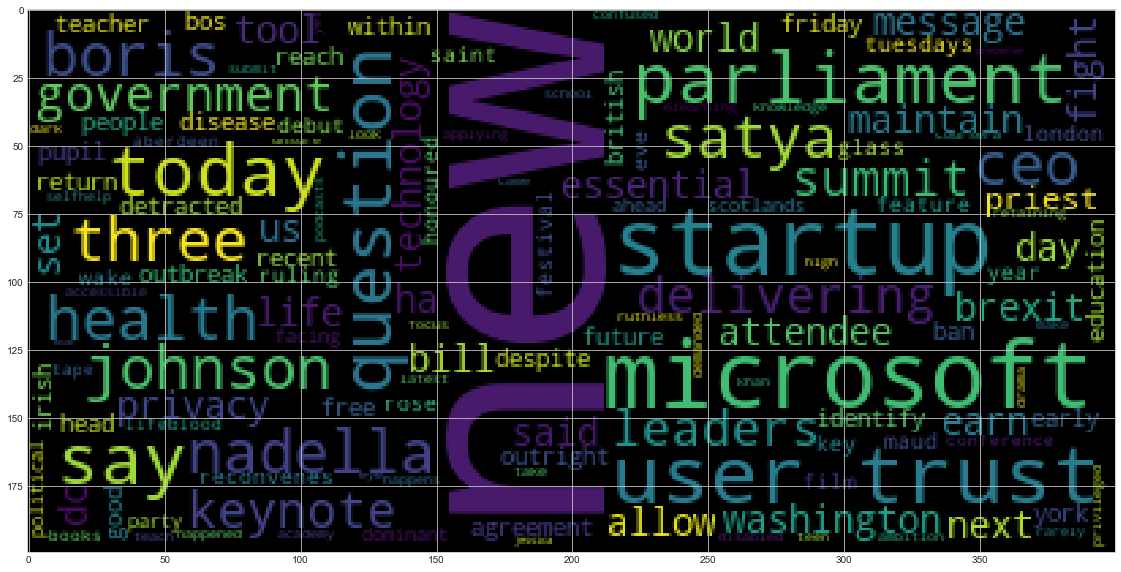

In [46]:
# Generate the Bitcoin word cloud
corpus = bitcoin_articles["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

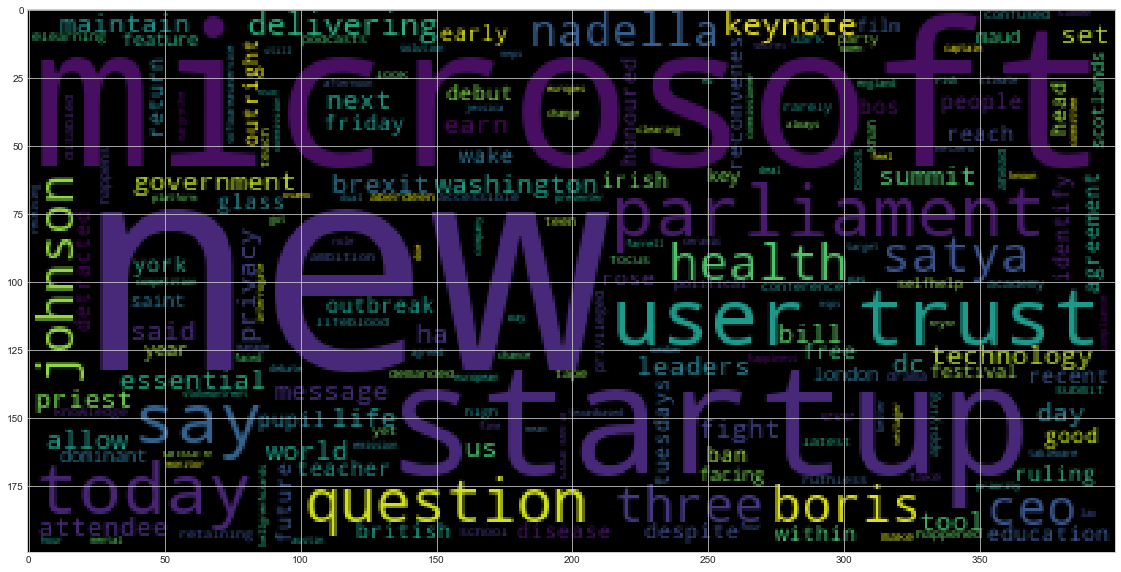

In [47]:
# Generate the Ethereum word cloud

corpus = ethereum_articles["description"]

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [48]:
import spacy
from spacy import displacy

In [49]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [50]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [64]:
# Concatenate all of the bitcoin text together
article = ethereum_articles["description"].str.cat()

In [65]:
# Run the NER processor on all of the text
doc = nlp(article)


# Add a title to the document

In [66]:
# Render the visualization
displacy.render(doc, style='ent')

In [67]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['New York', 'Washington, DC', 'Scotland', 'Aberdeen?Books', 'Brexit', 'US', 'Austin', 'Texas', 'Brexit', 'Washington, DC', 'England', 'Chicago']


---

## Ethereum NER

In [60]:
# Concatenate all of the bitcoin text together
article = bitcoin_articles["description"].str.cat()

In [61]:
# Run the NER processor on all of the text
doc = nlp(article)

# Add a title to the document

In [62]:
# Render the visualization
displacy.render(doc, style='ent')

In [63]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['New York', 'Washington, DC', 'Scotland', 'Aberdeen?Books', 'Brexit', 'US', 'Austin', 'Texas', 'Brexit', 'Washington, DC', 'England', 'Chicago']
